In [1]:
import pandas_datareader.data as web
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from talib import RSI
from math import pi
from bokeh.plotting import figure, show, output_file, output_notebook

In [2]:
start = '2016'
end = datetime(2021, 10, 21)
moex = web.DataReader('GAZP', 'moex', start=start, end=end)

In [3]:
close_gas = moex['CLOSE']

### RSI

In [4]:
rsi = RSI(close_gas, timeperiod=14)
print("RSI (first 10 elements)\n", rsi[-10:])

RSI (first 10 elements)
 TRADEDATE
2021-10-08    62.443264
2021-10-11    64.159169
2021-10-12    59.561965
2021-10-13    58.510323
2021-10-14    60.876308
2021-10-15    61.303285
2021-10-18    57.514318
2021-10-19    60.780507
2021-10-20    61.462909
2021-10-21    55.447767
dtype: float64


In [5]:
date = rsi.index[-100:]
overbought = [70 for x in range(len(rsi.index[-100:]))] 
oversold = [30 for x in range(len(rsi.index[-100:]))] 

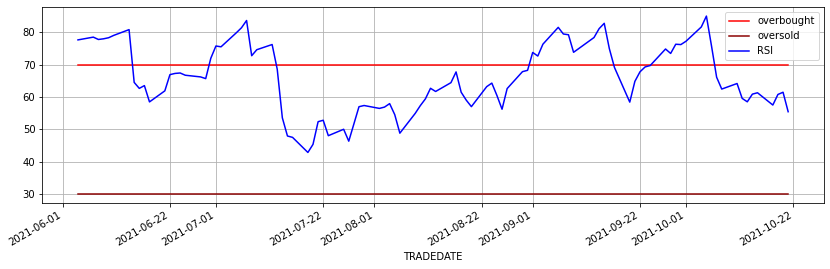

In [6]:
plt.figure(figsize=(14, 4))
plt.plot(date, overbought, color='red', label='overbought')
plt.plot(date, oversold, color='darkred', label='oversold')
rsi[-100:].plot(color='blue', label='RSI')
plt.legend()
plt.grid(True)

### MACD

In [7]:
from talib import MACD

In [8]:
macd, macdsignal, macdhist = MACD(close_gas[-200:], fastperiod=12, slowperiod=26, signalperiod=9)

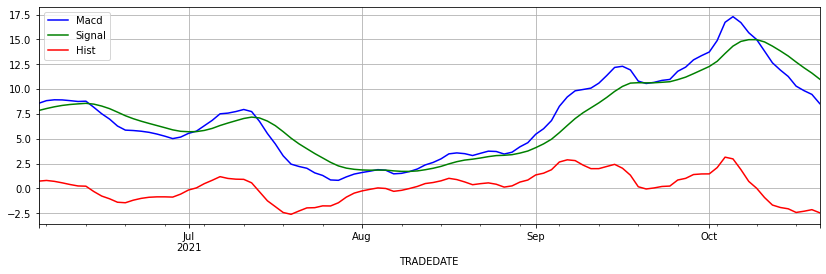

In [9]:
plt.figure(figsize=(14,4))
macd[-100:].plot(color='b', label='Macd')
macdsignal[-100:].plot(color='g', label='Signal')
macdhist[-100:].plot(color='r', label='Hist')
plt.legend()
plt.grid(True)

### Volume

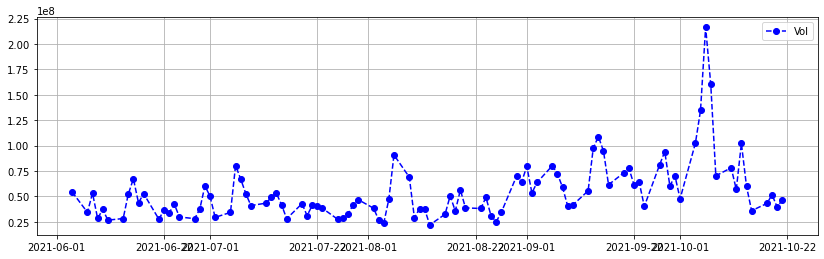

In [10]:
plt.figure(figsize=(14,4))
plt.plot(moex.VOLUME.index[-100:], moex.VOLUME[-100:], color='blue', label='Vol', marker='o', ls='--')
plt.grid(True)
plt.legend()

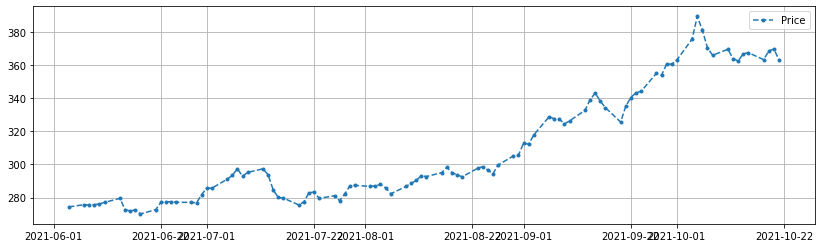

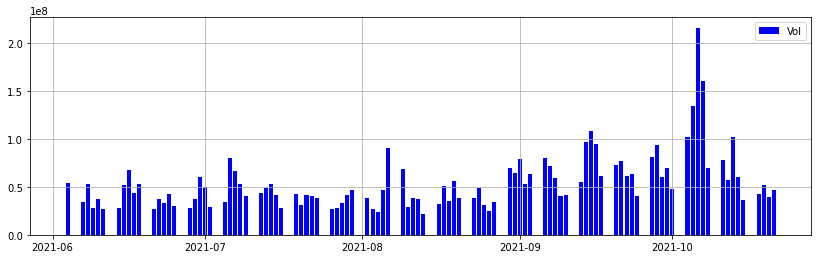

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(close_gas.index[-100:], close_gas.values[-100:], label='Price', ls='--', marker='.')
plt.grid(True)
plt.legend()
plt.figure(figsize=(14,4))
plt.bar(moex.VOLUME.index[-100:], moex.VOLUME[-100:],  color='blue', label='Vol')
plt.grid(True)
plt.legend()

In [38]:
close_gas.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-11',
               '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
               '2016-01-18', '2016-01-19',
               ...
               '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21'],
              dtype='datetime64[ns]', name='TRADEDATE', length=1466, freq=None)

### Сandlestick chart

In [13]:
from bokeh.plotting import figure, show, output_file, output_notebook

In [35]:
df = moex[-100:]
current_value = moex.CLOSE[-1]
current_value = [current_value for x in range(len(df.index))]

In [36]:
current_value[0]

363.37

In [15]:
output_notebook()

Loading BokehJS ...

In [37]:
WIDGETS = "pan, wheel_zoom, box_zoom, reset, save"
increase = df.CLOSE > df.OPEN
decrease = df.OPEN > df.CLOSE

w = 24*60*60*1000

p = figure(
    x_axis_type='datetime',
    tools=WIDGETS,
    plot_width=900,
    title="Сandlestick chart",
)

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha = 0.4
p.segment(df.index, df.HIGH, df.index, df.LOW, color="black")
p.vbar(df.index[increase], w, df.OPEN[increase], df.CLOSE[increase], fill_color="#D5E1DD", line_color="black")
p.vbar(df.index[decrease], w, df.OPEN[decrease], df.CLOSE[decrease], fill_color="#F2583E", line_color="black")
p.line(df.index, df.CLOSE[-1], legend_label="current value:"+str(current_value[0]), line_dash="4 4")

show(p)

Aroon Oscillator,

Commodity Channel Index,

Bollinger Bands,

Stochastic Oscillator(talib=Stochastic)

In [39]:
from talib import BBANDS

In [49]:
upperband, middleband, lowerband = BBANDS(close_gas, timeperiod=20)

In [50]:
WIDGETS = "pan, wheel_zoom, box_zoom, reset, save"
increase = df.CLOSE > df.OPEN
decrease = df.OPEN > df.CLOSE

w = 24*60*60*1000

p = figure(
    x_axis_type='datetime',
    tools=WIDGETS,
    plot_width=900,
    title="Сandlestick chart",
)

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha = 0.4
p.segment(df.index, df.HIGH, df.index, df.LOW, color="black")
p.vbar(df.index[increase], w, df.OPEN[increase], df.CLOSE[increase], fill_color="#D5E1DD", line_color="black")
p.vbar(df.index[decrease], w, df.OPEN[decrease], df.CLOSE[decrease], fill_color="#F2583E", line_color="black")
p.line(df.index, df.CLOSE[-1], legend_label="current value:"+str(current_value[0]), line_dash="4 4")

# BollingerBand
p.line(df.index, upperband[-100:])
p.line(df.index, middleband[-100:])
p.line(df.index, lowerband[-100:])

show(p)